# 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
satr=pd.read_csv("D:/Datasets/SalaryData_Train.csv")
satn=pd.read_csv("D:/Datasets/SalaryData_Test.csv")

In [3]:
print(satr.shape)
print(satn.shape)

(30161, 14)
(15060, 14)


In [4]:
satr.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
satn.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
satr.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [7]:
satn.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

In [8]:
satn.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

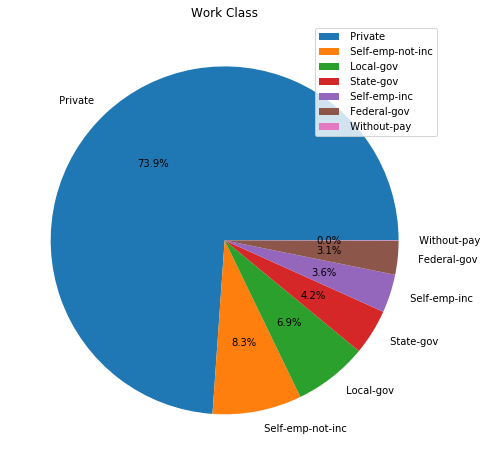

In [9]:
label=satr['workclass'].value_counts().keys().tolist()
values=satr['workclass'].value_counts().tolist()
sizes=values
fig1,ax1=plt.subplots(figsize=(8,8))
ax1.pie(sizes,labels=label,autopct='%1.1f%%')
plt.title("Work Class")
plt.legend()
plt.show()

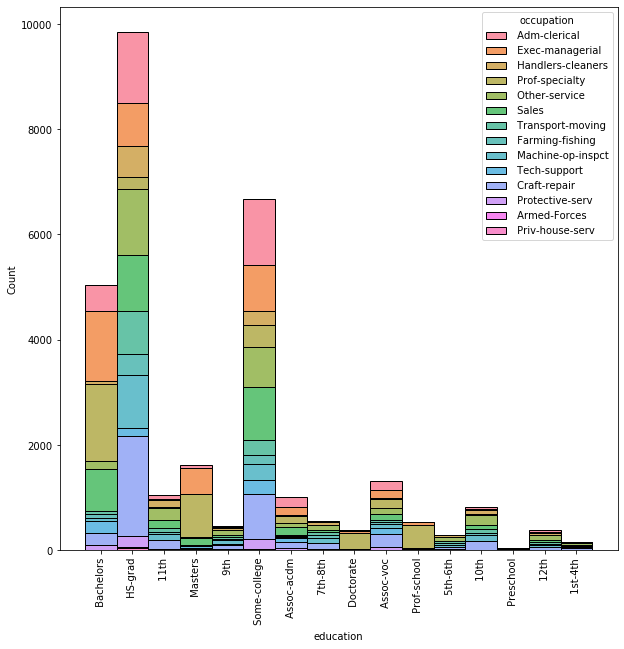

In [16]:

%matplotlib inline
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.histplot(binwidth=1, x="education", hue="occupation", data=satr, stat="count", multiple="stack")

C:\Users\vinay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


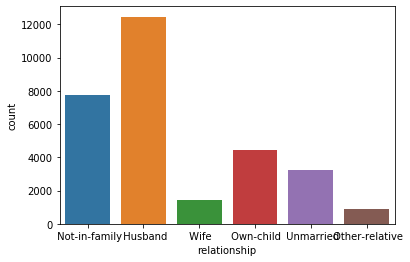

In [14]:
sns.countplot(satr['relationship'])

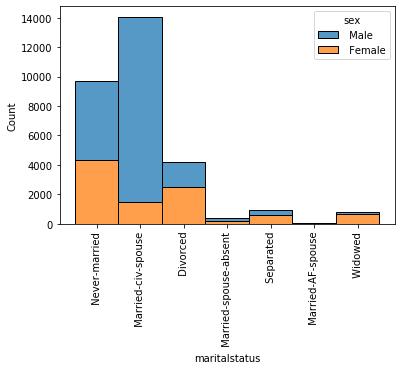

In [20]:
plt.xticks(rotation=90)
sns.histplot(x='maritalstatus',hue='sex',data=satr,stat="count", multiple="stack")

In [22]:
dummy_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in dummy_columns:
    satr[i]= enc.fit_transform(satr[i])
    satn[i]= enc.fit_transform(satn[i])

In [26]:
satn.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [27]:
satn.shape


(15060, 14)

In [28]:
x_train=satr.iloc[:,0:13]
y_train=satr.iloc[:,13]

In [30]:
x_test=satn.iloc[:,0:13]
y_test=satn.iloc[:,13]

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
ignb=GaussianNB()
imnb=MultinomialNB()
#Buliding model using Test and predict(GaussianNB) 
Pred_GB=ignb.fit(x_train,y_train).predict(x_test)

#Buliding model using Test and predict(MultinomialNB)
Pred_MB=imnb.fit(x_train,y_train).predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Pred_GB)
pd.crosstab(y_test.values.flatten(),Pred_GB)  
np.mean(Pred_GB==y_test.values.flatten())#80%

0.7946879150066402

In [42]:
print(confusion_matrix(y_test,Pred_MB))
print(pd.crosstab(y_test.values.flatten(),Pred_MB))  
np.mean(Pred_MB==y_test.values.flatten())

[[10891   469]
 [ 2920   780]]
col_0    <=50K   >50K
row_0                
 <=50K   10891    469
 >50K     2920    780


0.7749667994687915

In [41]:
NB_accuracy=(10891+780)/(10891+780+469+2920)

In [43]:
#Buliding model using Train and predict(GaussianNB)
Pred2_GB=ignb.fit(x_train,y_train).predict(x_train)
confusion_matrix(y_train,Pred2_GB)
pd.crosstab(y_train.values.flatten(),Pred2_GB)
np.mean(Pred2_GB==y_train.values.flatten())#80%

0.7953317197705646

In [ ]:
#Buliding model using Train and predict(MultinomialNB)
Pred2_MB=imnb.fit(x_train,y_train).predict(x_train)
confusion_matrix(x_train,Pred2_MB)
pd.crosstab(y_train.values.flatten(),Pred2_MB)
np.mean(Pred2_MB==y_train.values.flatten())
#78